In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.utils import shuffle

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Balancing The Data

In [2]:
#classG = df[df['class'] == 'g']
#classH = df[df['class'] == 'h']
#countG, countH = df['class'].value_counts()

#classGUnder = classG.sample(countH)
#newDataset = pd.concat([classGUnder, classH],axis=0)
#newDataset.to_csv('D:\collage\Semester 4\Machine Learning\Sections'+'balanced_dataset.csv',index=False)

<Axes: >

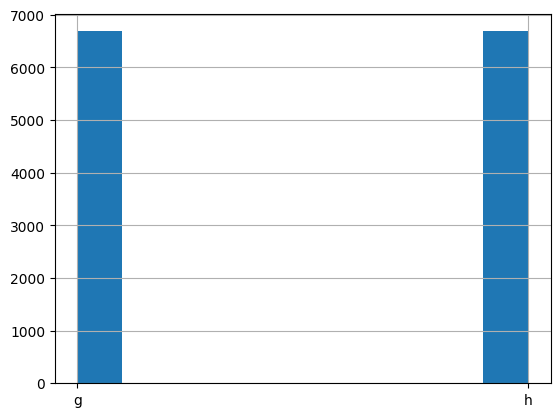

In [3]:
#Read the new balanced data 
newDataset = pd.read_csv('D:\collage\Semester 4\Machine Learning\Sectionsbalanced_dataset.csv')
newDataset['class'].hist()

# Data Spilt 

In [4]:
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']

x, x_test, y, y_test = train_test_split(x,y, test_size=0.15)
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.15)

# Decision Tree

In [5]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [6]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.78      0.79      0.78      1001
           h       0.79      0.78      0.78      1006

    accuracy                           0.78      2007
   macro avg       0.78      0.78      0.78      2007
weighted avg       0.78      0.78      0.78      2007



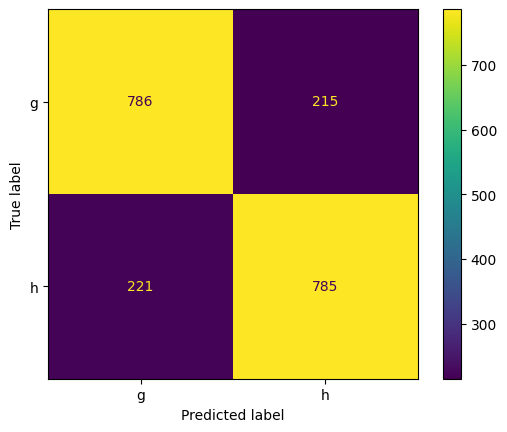

In [7]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

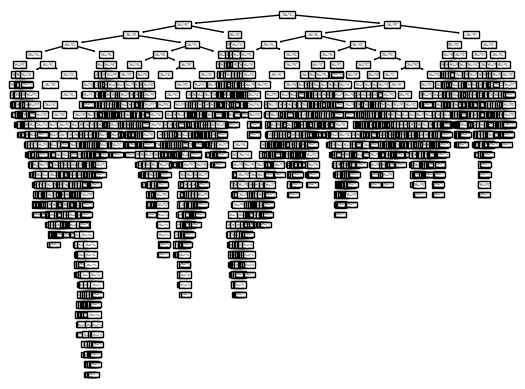

In [8]:
tree.plot_tree(model)
plt.show()

# AdaBoost

In [10]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0 
greatestN = 0
scores = []
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()

KeyboardInterrupt: 

In [ ]:
greatestN

In [ ]:
model = AdaBoostClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show() 

# Random Forest

In [13]:
#estimate the best n_estimators for random forest
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0
greatestN = 0
scores = []
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()

KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier(n_estimators=greatestN)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()